In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Shopping Mall Customer Segmentation Data .csv')

In [5]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [6]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.2+ KB


In [9]:
df.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000


In [11]:
df.isnull().sum()

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

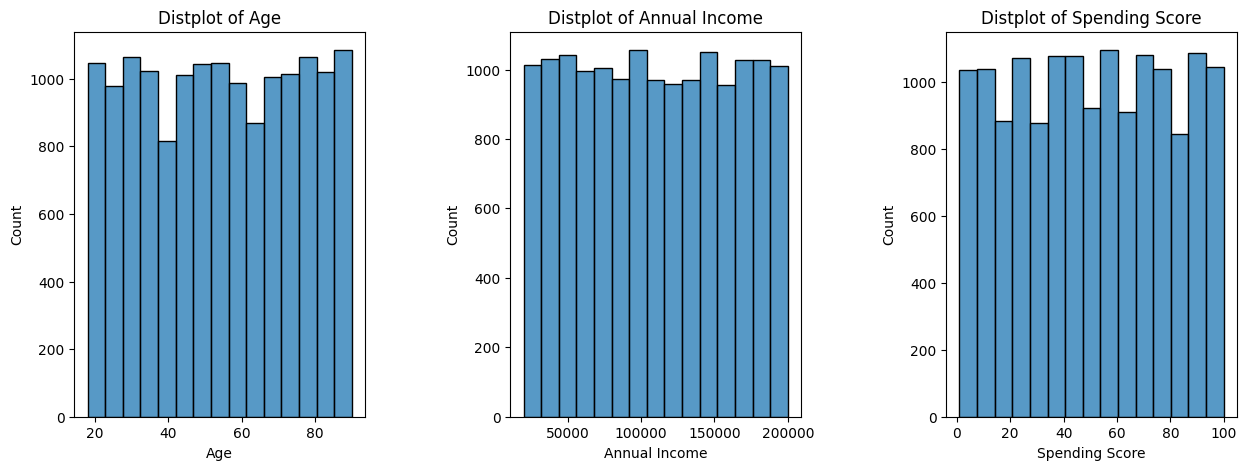

In [17]:
plt.figure(1, figsize=(15, 5))

for n, x in enumerate(['Age', 'Annual Income', 'Spending Score'], start=1):
    plt.subplot(1, 3, n)
    sns.histplot(df[x], bins=15)
    plt.title('Distplot of {}'.format(x))

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

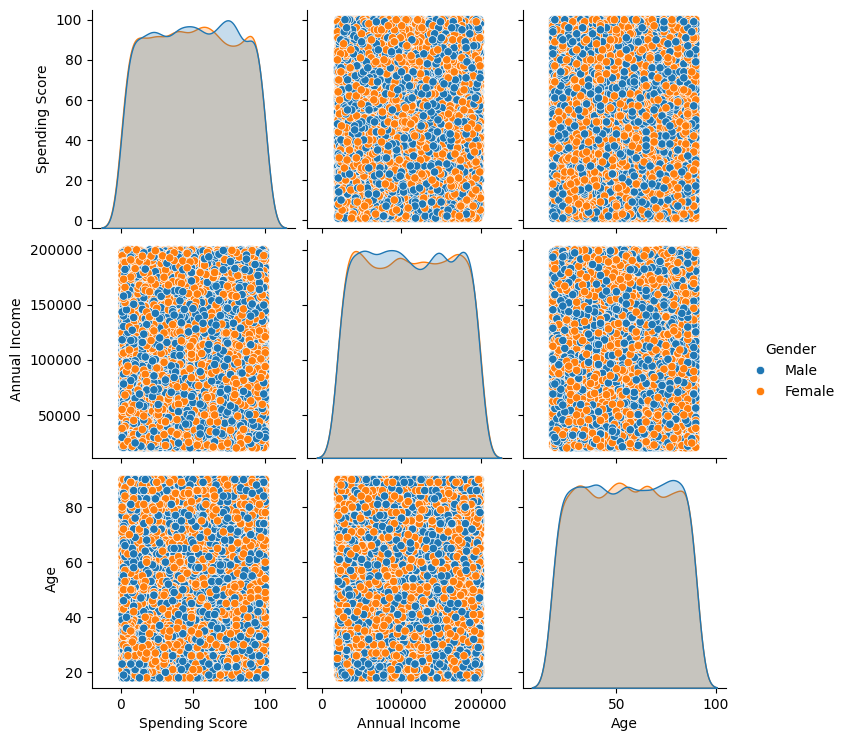

In [18]:
sns.pairplot(df,vars=['Spending Score','Annual Income','Age'],hue="Gender")
plt.show()

In [19]:
x1=df[['Age','Spending Score']].iloc[:,:].values
inertia=[]
for n in range(1,15):
    algorithm=KMeans(
        n_clusters=n,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=0.0001,
        random_state=111,
        algorithm='elkan'
    )
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)

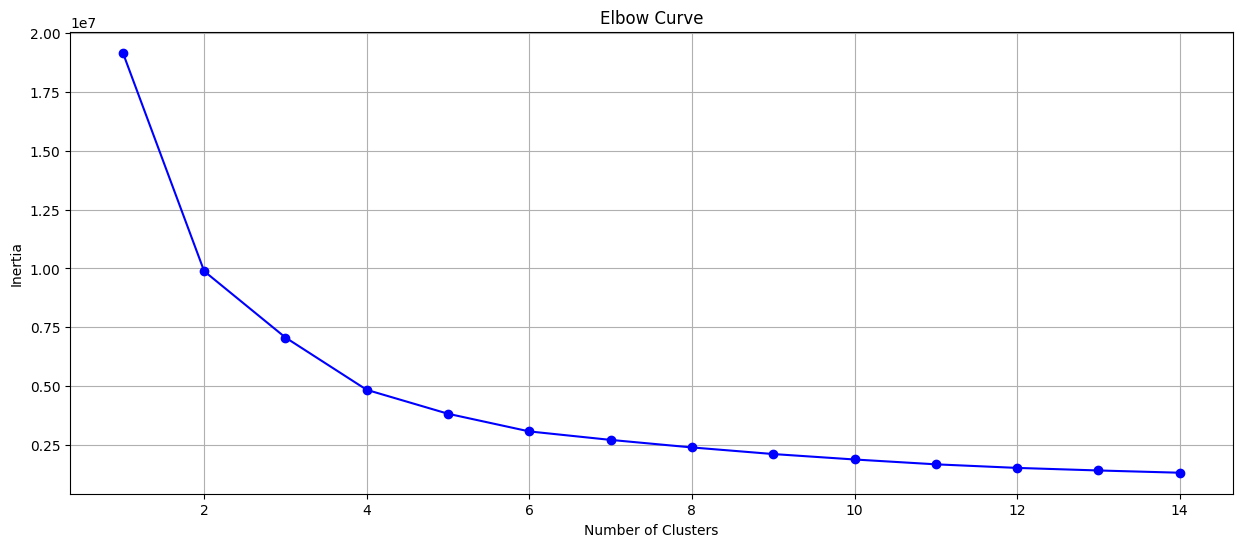

In [24]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 15), inertia, marker='o', linestyle='-', color='b')  # Plot inertia values
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

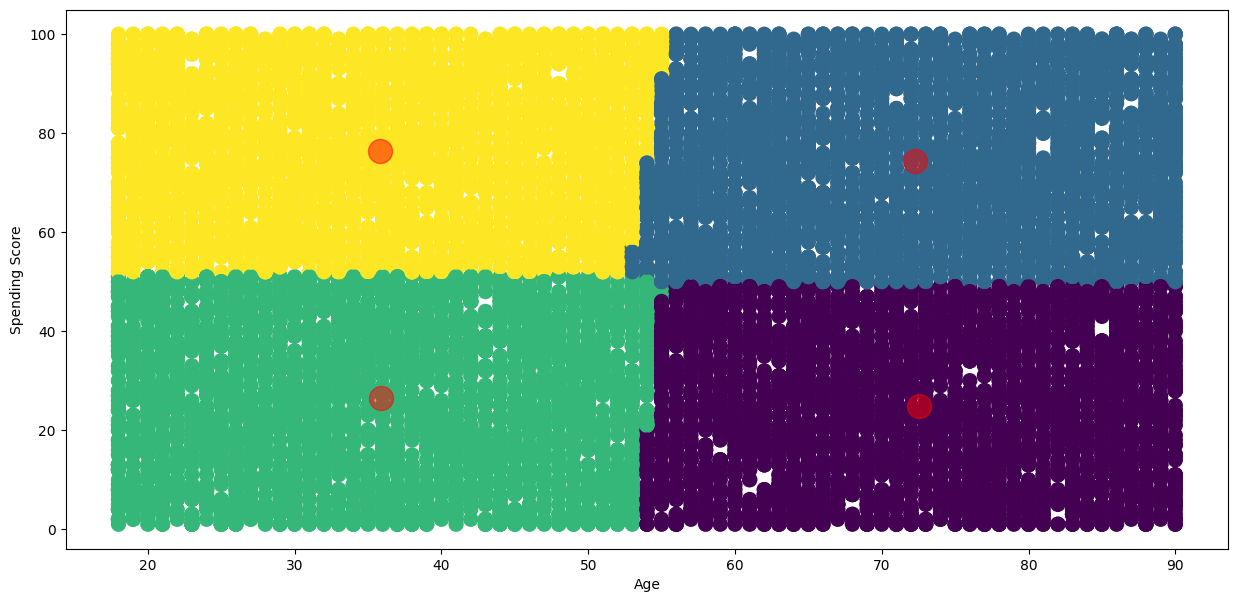

In [25]:
algorithm=KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=111,
    algorithm='elkan'
)
algorithm.fit(x1)
labels1=algorithm.labels_
centroids1=algorithm.cluster_centers_

plt.figure(1,figsize=(15,7))
plt.scatter(x='Age',y='Spending Score',data=df,c=labels1,s=100)
plt.scatter(x=centroids1[:,0],y=centroids1[:,1],s=300,c='red',alpha=0.5)
plt.ylabel('Spending Score')
plt.xlabel('Age')
plt.show()

In [39]:
hierarchical = AgglomerativeClustering(n_clusters=4)
labels2 = hierarchical.fit_predict(x1)

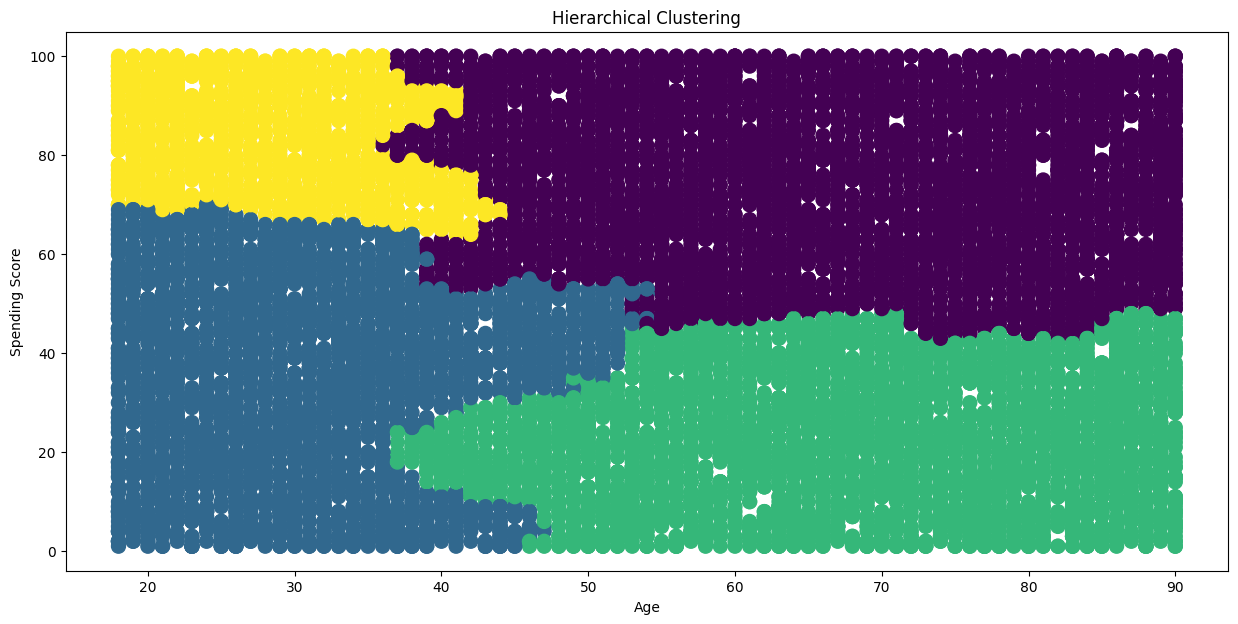

In [40]:
plt.figure(figsize=(15, 7))
plt.scatter(x='Age', y='Spending Score', data=df, c=labels2, s=100)
plt.ylabel('Spending Score')
plt.xlabel('Age')
plt.title('Hierarchical Clustering')
plt.show()

In [41]:
dbscan = DBSCAN(eps=5, min_samples=10)
labels3 = dbscan.fit_predict(x1)

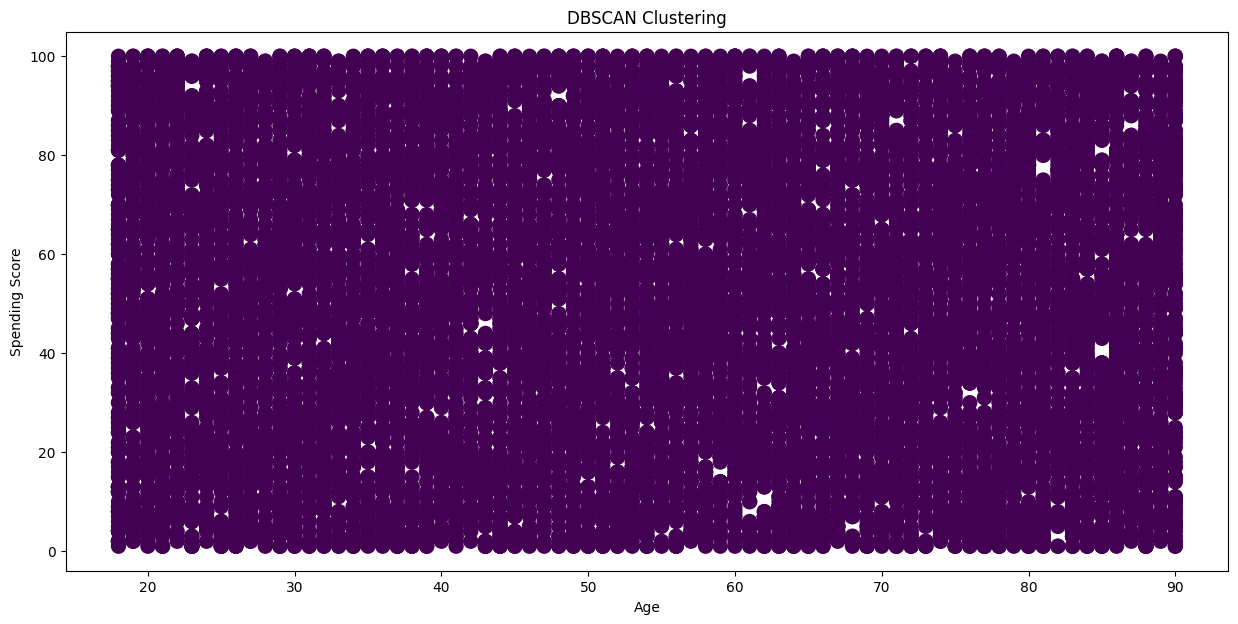

In [42]:
plt.figure(figsize=(15, 7))
plt.scatter(x='Age', y='Spending Score', data=df, c=labels3, s=100)
plt.ylabel('Spending Score')
plt.xlabel('Age')
plt.title('DBSCAN Clustering')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [47]:
kmeans.fit(x1)

KMeans(n_clusters=4, random_state=42)

In [48]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

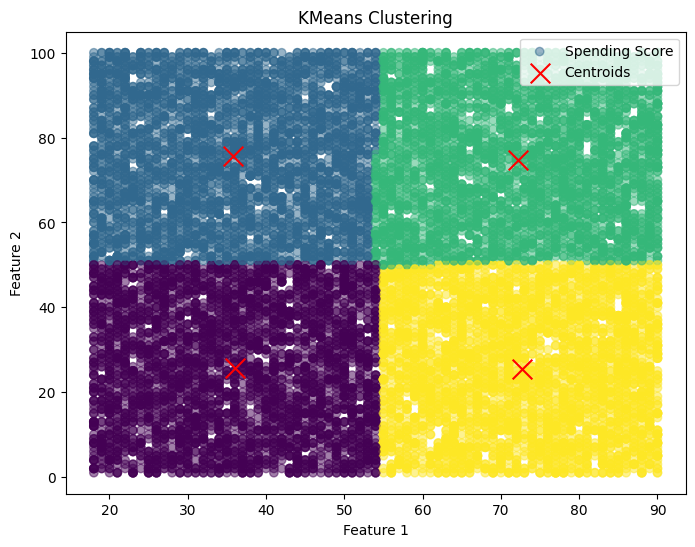

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(x='Age',y='Spending Score',data=df,c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()